# SchNet-Fe(II)

## Import SchNet Fe(II) trainings

In [1]:
import wandb
import pandas as pd

from analysis.helper import extract_config

api = wandb.Api()

In [2]:
runs = api.runs(
    "modelforge_nnps/aimnet2_tmqm_openff",
)
print(f"Found {len(runs)} runs")
summary_list, config_list, name_list = [], [], []

Found 79 runs


In [37]:
extract_config(runs[0].config["training_parameter"], "tags")

['seed=42', 'full_dataset_sm3_v1.1', 'per_system_energy=0.0001', 'per_system_dipole_moment=0', 'per_atom_charge=1', '0.1.4+300.gef9c8be.dirty', 'tmqm_openff_local', 'AimNet2', 'loss-per_system_energy', 'loss-per_system_dipole_moment', 'loss-per_atom_charge']


{'tags': ['seed=42',
  'full_dataset_sm3_v1.1',
  'per_system_energy=0.0001',
  'per_system_dipole_moment=0',
  'per_atom_charge=1',
  '0.1.4+300.gef9c8be.dirty',
  'tmqm_openff_local',
  'AimNet2',
  'loss-per_system_energy',
  'loss-per_system_dipole_moment',
  'loss-per_atom_charge']}

In [32]:
extract_config(training_parameter, "weight")

{'per_system_energy': 1.0, 'per_system_dipole_moment': 0.0, 'per_atom_charge': 0.0}


{'weight': {'per_system_energy': 1.0,
  'per_system_dipole_moment': 0.0,
  'per_atom_charge': 0.0}}

In [33]:
test_results = []

for run in runs:
    if run.state == "finished":
        record = {}
    
        record.update({"name": run.name})
        
        training_parameter = run.config["training_parameter"]
        potential_parameter = run.config['potential_parameter']
        tags = extract_config(training_parameter, "tags")["tags"]
        record.update({
            "test/per_system_energy/mae": run.summary["test/per_system_energy/mae"],
            "test/per_system_energy/rmse": run.summary["test/per_system_energy/rmse"],
        })
        
        record.update(extract_config(potential_parameter, "number_of_radial_basis_functions"))
        record.update(extract_config(potential_parameter, "number_of_vector_features"))
        record.update(extract_config(potential_parameter, "number_of_per_atom_features"))

        loss_weights = extract_config(training_parameter, "weight")
        record.update(loss_weights["weight"])

        record["dataset_version"] = extract_config(run.config["training_parameter"], "tags")["tags"][1]
        
        record.update(
            extract_config(training_parameter, "seed")
        )
        test_results.append(record)

test_results_df = pd.DataFrame(test_results)

['seed=42', 'full_dataset_sm3_v1.1', 'per_system_energy=0.0001', 'per_system_dipole_moment=0', 'per_atom_charge=1', '0.1.4+300.gef9c8be.dirty', 'tmqm_openff_local', 'AimNet2', 'loss-per_system_energy', 'loss-per_system_dipole_moment', 'loss-per_atom_charge']
{'per_system_energy': 0.0001, 'per_system_dipole_moment': 0.0, 'per_atom_charge': 1.0}
['seed=42', 'full_dataset_sm3_v1.1', 'per_system_energy=0.0001', 'per_system_dipole_moment=0', 'per_atom_charge=1', '0.1.4+300.gef9c8be.dirty', 'tmqm_openff_local', 'AimNet2', 'loss-per_system_energy', 'loss-per_system_dipole_moment', 'loss-per_atom_charge']
['seed=42', 'full_dataset_sm5_v1.1', 'per_system_energy=0.0001', 'per_system_dipole_moment=0', 'per_atom_charge=1', '0.1.4+300.gef9c8be.dirty', 'tmqm_openff_local', 'AimNet2', 'loss-per_system_energy', 'loss-per_system_dipole_moment', 'loss-per_atom_charge']
{'per_system_energy': 0.0001, 'per_system_dipole_moment': 0.0, 'per_atom_charge': 1.0}
['seed=42', 'full_dataset_sm5_v1.1', 'per_system_

In [34]:
test_results_df.sort_values(by="test/per_system_energy/mae").head(20)

,name,test/per_system_energy/mae,test/per_system_energy/rmse,number_of_radial_basis_functions,number_of_vector_features,number_of_per_atom_features,per_system_energy,per_system_dipole_moment,per_atom_charge,dataset_version,seed
36,"full_dataset_sm3_v1.1_[0.0001, 0, 1]_(44)",58.300758,99.244064,64,8,128,0.0001,0.0,1.0,full_dataset_sm3_v1.1,44
32,"full_dataset_sm1_v1.1_[0.0001, 0, 1]_(44)",61.799049,102.220917,64,8,128,0.0001,0.0,1.0,full_dataset_sm1_v1.1,44
65,"full_dataset_sm1_v1.1_[0.0001, 0.1, 0]_(46)",63.617020,107.366287,64,8,128,0.0001,0.1,0.0,full_dataset_sm1_v1.1,46
34,"full_dataset_sm1_v1.1_[1, 0, 0]_(44)",64.955086,104.712967,64,8,128,1.0000,0.0,0.0,full_dataset_sm1_v1.1,44
18,"full_dataset_sm1_v1.1_[1, 0, 0]_(43)",65.355057,108.406601,64,8,128,1.0000,0.0,0.0,full_dataset_sm1_v1.1,43
48,"full_dataset_sm1_v1.1_[0.0001, 0, 1]_(45)",65.700714,104.877693,64,8,128,0.0001,0.0,1.0,full_dataset_sm1_v1.1,45
0,"full_dataset_sm3_v1.1_[0.0001, 0, 1]_(42)",66.369408,102.739128,64,8,128,0.0001,0.0,1.0,full_dataset_sm3_v1.1,42
9,"full_dataset_sm3_v1.1_[1, 0, 0]_(42)",66.426872,100.986641,64,8,128,1.0000,0.0,0.0,full_dataset_sm3_v1.1,42
64,"full_dataset_sm1_v1.1_[0.0001, 0, 1]_(46)",66.439507,105.694183,64,8,128,0.0001,0.0,1.0,full_dataset_sm1_v1.1,46
47,"full_dataset_sm1_v1.1_[0.0001, 0.1, 1]_(45)",66.850250,105.095284,64,8,128,0.0001,0.1,1.0,full_dataset_sm1_v1.1,45


In [35]:
test_results_df.sort_values(by="test/per_system_energy/mae").tail(20)

,name,test/per_system_energy/mae,test/per_system_energy/rmse,number_of_radial_basis_functions,number_of_vector_features,number_of_per_atom_features,per_system_energy,per_system_dipole_moment,per_atom_charge,dataset_version,seed
77,"full_dataset_v1.1_[0.0001, 0.1, 0]_(46)",198.036377,245.076538,64,8,128,0.0001,0.1,0.0,full_dataset_v1.1,46
76,"full_dataset_v1.1_[0.0001, 0, 1]_(46)",198.098419,245.013306,64,8,128,0.0001,0.0,1.0,full_dataset_v1.1,46
27,"full_dataset_v1.1_[0.0001, 0.1, 1]_(43)",198.279724,244.486710,64,8,128,0.0001,0.1,1.0,full_dataset_v1.1,43
61,"full_dataset_v1.1_[0.0001, 0.1, 0]_(45)",199.091919,246.129425,64,8,128,0.0001,0.1,0.0,full_dataset_v1.1,45
62,"full_dataset_v1.1_[1, 0, 0]_(45)",199.885437,246.496948,64,8,128,1.0000,0.0,0.0,full_dataset_v1.1,45
78,"full_dataset_v1.1_[1, 0, 0]_(46)",200.506821,246.459610,64,8,128,1.0000,0.0,0.0,full_dataset_v1.1,46
13,"full_dataset_v1.1_[0.0001, 0.1, 0]_(42)",200.585770,247.802780,64,8,128,0.0001,0.1,0.0,full_dataset_v1.1,42
75,"full_dataset_v1.1_[0.0001, 0.1, 1]_(46)",201.104691,246.862411,64,8,128,0.0001,0.1,1.0,full_dataset_v1.1,46
45,"full_dataset_v1.1_[0.0001, 0.1, 0]_(44)",201.558609,248.991776,64,8,128,0.0001,0.1,0.0,full_dataset_v1.1,44
2,"full_dataset_v1.1_[0.0001, 0.1, 1]_(42)",201.654968,248.175201,64,8,128,0.0001,0.1,1.0,full_dataset_v1.1,42


## Plotting

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context("notebook")

ModuleNotFoundError: No module named 'seaborn'

### Dataset splitting consistency

Text(0.5, 1.0, 'Stability of dataset splitting (kJ/mol)')

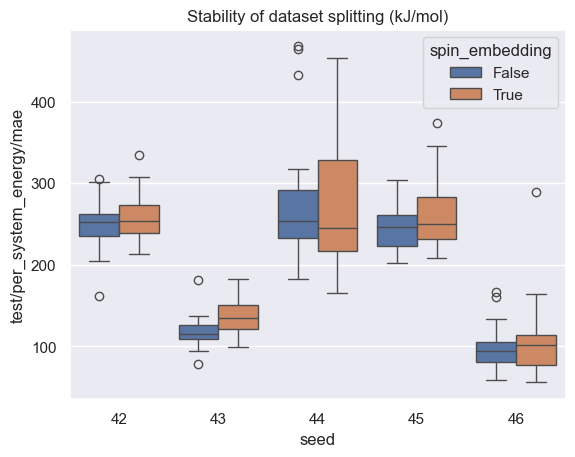

In [99]:
ax = sns.boxplot(
    data=test_results_df,
    x="seed",
    y="test/per_system_energy/mae",
    hue="spin_embedding",
)
ax.set_ylabel("test MAE (kJ/mol)")
ax.set_title("Stability of dataset splitting")

### Impact of number_of_per_atom_features

In [121]:
test_results_df[test_results_df["number_of_per_atom_features"] == 64][test_results_df["number_of_filters"] == 64]

/var/folders/7w/svn2b6t10zxbc26rffd69qpc0000gp/T/ipykernel_7757/3098178216.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_results_df[test_results_df["number_of_per_atom_features"] == 64][test_results_df["number_of_filters"] == 64]


,name,test/per_system_energy/mae,test/per_system_energy/rmse,number_of_per_atom_features,number_of_filters,number_of_interaction_modules,spin_embedding,seed,maximum_interaction_radius
78,6_64_64_5,103.876930,129.468018,64,64,6,True,43,0.5
79,6_64_64_5,96.515976,117.702980,64,64,6,False,43,0.5
80,6_64_64_6,114.694633,139.177643,64,64,6,False,43,0.6
81,6_64_64_6,151.676849,212.915161,64,64,6,True,43,0.6
82,6_64_64_7,134.557861,190.924194,64,64,6,False,43,0.7
83,6_64_64_7,98.639687,123.578621,64,64,6,True,43,0.7
239,6_64_64_5,113.738251,162.625366,64,64,6,False,46,0.5
241,6_64_64_5,289.566467,335.799957,64,64,6,True,46,0.5
242,6_64_64_6,84.313911,122.753563,64,64,6,False,46,0.6
243,6_64_64_6,129.852631,186.501480,64,64,6,True,46,0.6


Text(0.5, 1.0, 'With spin multiplicity embedding')

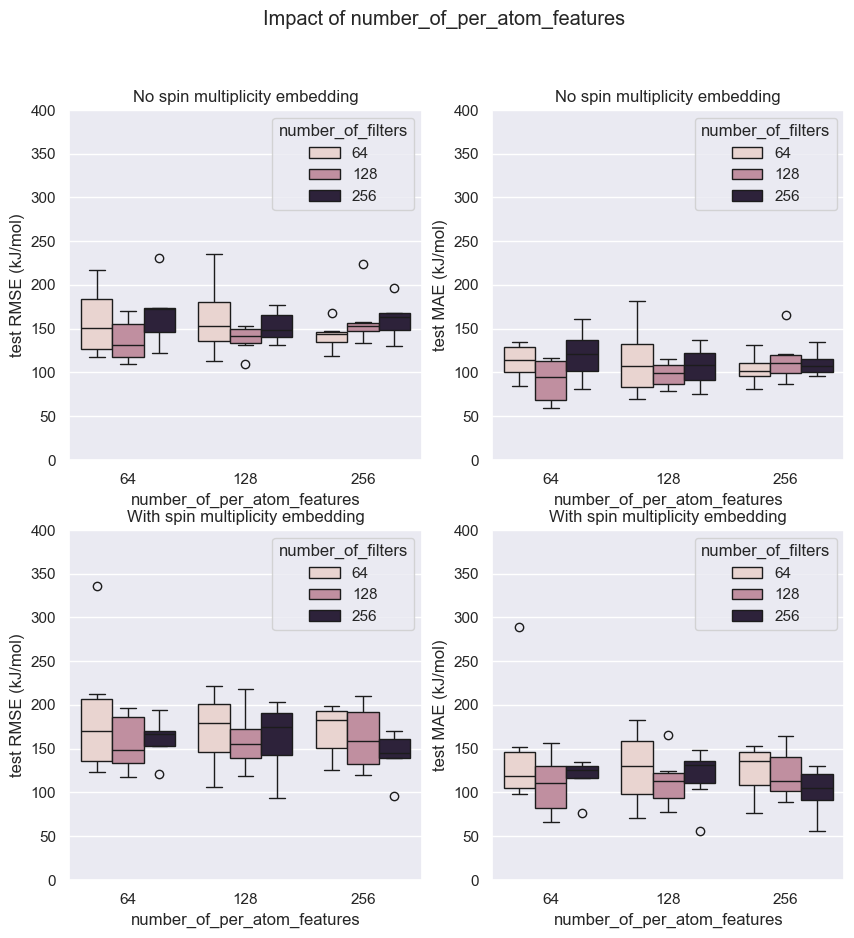

In [123]:
test_results_df = test_results_df[test_results_df["seed"] != 42]
test_results_df = test_results_df[test_results_df["seed"] != 44]
test_results_df = test_results_df[test_results_df["seed"] != 45]


fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Impact of number_of_per_atom_features")

# RMSE
filtered_results = test_results_df[test_results_df["spin_embedding"] == False]
sns.boxplot(
    ax=axes[0, 0],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_filters",
)
axes[0, 0].set_ylim(0, 400)
axes[0, 0].set_ylabel("test RMSE (kJ/mol)")
axes[0, 0].set_title("No spin multiplicity embedding")


filtered_results = test_results_df[test_results_df["seed"] != 42]
filtered_results = filtered_results[filtered_results["seed"] != 44]
filtered_results = filtered_results[filtered_results["seed"] != 45]
# MAE
filtered_results = test_results_df[test_results_df["spin_embedding"] == False]
sns.boxplot(
    ax=axes[0, 1],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/mae",
    hue="number_of_filters",
)
axes[0, 1].set_ylim(0, 400)
axes[0, 1].set_ylabel("test MAE (kJ/mol)")
axes[0, 1].set_title("No spin multiplicity embedding")

# RMSE
filtered_results = test_results_df[test_results_df["spin_embedding"] == True]
sns.boxplot(
    ax=axes[1, 0],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/rmse",
    hue="number_of_filters",
)
axes[1, 0].set_ylim(0, 400)
axes[1, 0].set_ylabel("test RMSE (kJ/mol)")
axes[1, 0].set_title("With spin multiplicity embedding")

# MAE
filtered_results = test_results_df[test_results_df["spin_embedding"] == True]
sns.boxplot(
    ax=axes[1, 1],
    data=filtered_results,
    x="number_of_per_atom_features",
    y="test/per_system_energy/mae",
    hue="number_of_filters",
)
axes[1, 1].set_ylim(0, 400)
axes[1, 1].set_ylabel("test MAE (kJ/mol)")
axes[1, 1].set_title("With spin multiplicity embedding")

### Impact of number_of_filters

Text(0.5, 1.0, 'With spin multiplicity embedding')

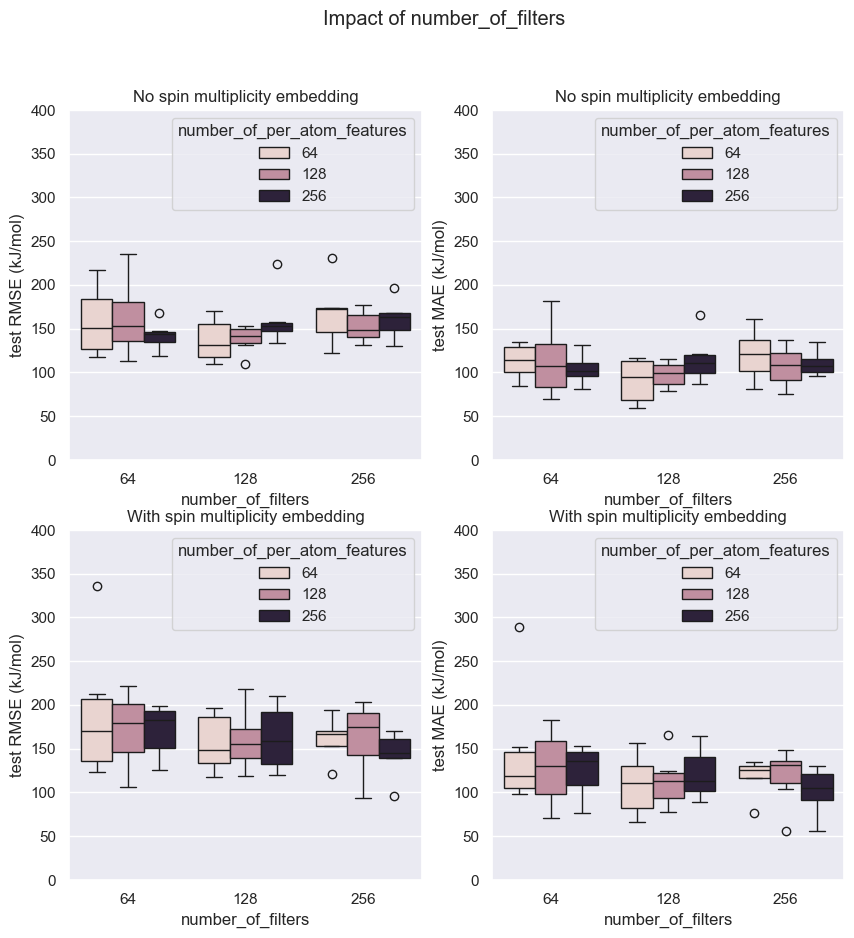

In [125]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Impact of number_of_filters")

# RMSE
filtered_results = test_results_df[test_results_df["spin_embedding"] == False]
sns.boxplot(
    ax=axes[0, 0],
    data=filtered_results,
    x="number_of_filters",
    y="test/per_system_energy/rmse",
    hue="number_of_per_atom_features",
)
axes[0, 0].set_ylim(0, 400)
axes[0, 0].set_ylabel("test RMSE (kJ/mol)")
axes[0, 0].set_title("No spin multiplicity embedding")

# MAE
filtered_results = test_results_df[test_results_df["spin_embedding"] == False]
sns.boxplot(
    ax=axes[0, 1],
    data=filtered_results,
    x="number_of_filters",
    y="test/per_system_energy/mae",
    hue="number_of_per_atom_features",
)
axes[0, 1].set_ylim(0, 400)
axes[0, 1].set_ylabel("test MAE (kJ/mol)")
axes[0, 1].set_title("No spin multiplicity embedding")

# RMSE
filtered_results = test_results_df[test_results_df["spin_embedding"] == True]
sns.boxplot(
    ax=axes[1, 0],
    data=filtered_results,
    x="number_of_filters",
    y="test/per_system_energy/rmse",
    hue="number_of_per_atom_features",
)
axes[1, 0].set_ylim(0, 400)
axes[1, 0].set_ylabel("test RMSE (kJ/mol)")
axes[1, 0].set_title("With spin multiplicity embedding")

# MAE
filtered_results = test_results_df[test_results_df["spin_embedding"] == True]
sns.boxplot(
    ax=axes[1, 1],
    data=filtered_results,
    x="number_of_filters",
    y="test/per_system_energy/mae",
    hue="number_of_per_atom_features",
)
axes[1, 1].set_ylim(0, 400)
axes[1, 1].set_ylabel("test MAE (kJ/mol)")
axes[1, 1].set_title("With spin multiplicity embedding")

### Impact of maximum_interaction_radius

Text(0.5, 1.0, 'Impact of maximum interaction radius at 64 per atom features')

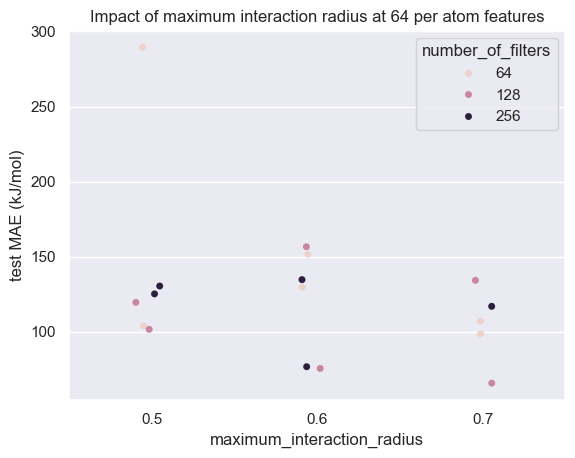

In [130]:
filtered_results = test_results_df[test_results_df["number_of_per_atom_features"] == 64]
filtered_results = filtered_results[filtered_results["seed"] != 42]
filtered_results = filtered_results[filtered_results["seed"] != 44]
filtered_results = filtered_results[filtered_results["seed"] != 45]


ax = sns.stripplot(
    data=filtered_results[filtered_results["spin_embedding"] == True],
    x="maximum_interaction_radius",
    y="test/per_system_energy/mae",
    hue="number_of_filters",
)
ax.set_ylabel("test MAE (kJ/mol)")
ax.set_title("Impact of maximum interaction radius at 64 per atom features")

Text(0.5, 1.0, 'Impact of maximum interaction radius at 128 per atom features')

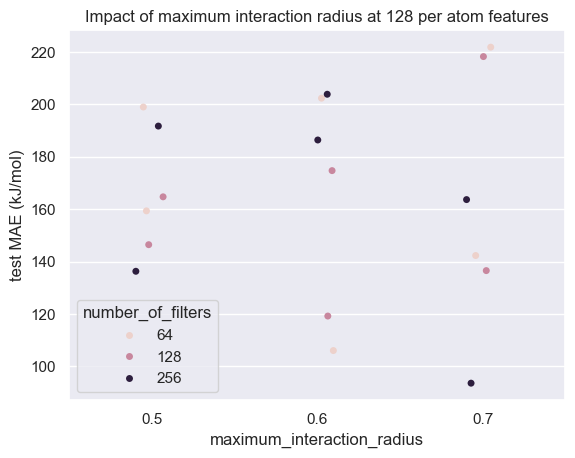

In [131]:
filtered_results = test_results_df[test_results_df["number_of_per_atom_features"] == 128]
filtered_results = filtered_results[filtered_results["seed"] != 42]
filtered_results = filtered_results[filtered_results["seed"] != 44]
filtered_results = filtered_results[filtered_results["seed"] != 45]


ax = sns.stripplot(
    data=filtered_results[filtered_results["spin_embedding"] == True],
    x="maximum_interaction_radius",
    y="test/per_system_energy/rmse",
    hue="number_of_filters",
)
ax.set_ylabel("test MAE (kJ/mol)")
ax.set_title("Impact of maximum interaction radius at 128 per atom features")

Text(0.5, 1.0, 'Impact of maximum interaction radius')

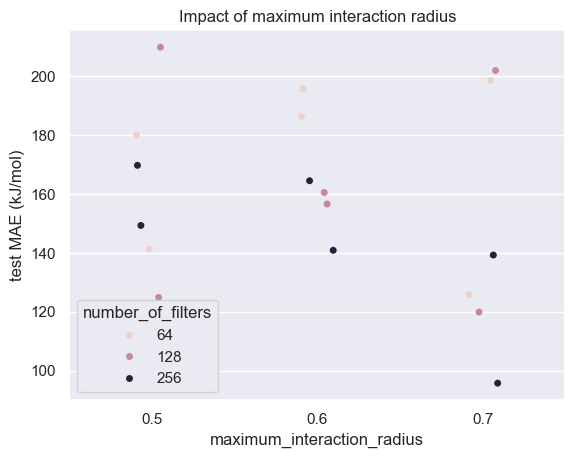

In [129]:
filtered_results = test_results_df[test_results_df["number_of_per_atom_features"] == 256]
filtered_results = filtered_results[filtered_results["seed"] != 42]
filtered_results = filtered_results[filtered_results["seed"] != 44]
filtered_results = filtered_results[filtered_results["seed"] != 45]


ax = sns.stripplot(
    data=filtered_results[filtered_results["spin_embedding"] == True],
    x="maximum_interaction_radius",
    y="test/per_system_energy/rmse",
    hue="number_of_filters",
)
ax.set_ylabel("test MAE (kJ/mol)")
ax.set_title("Impact of maximum interaction radius at 256 per atom features")